<a href="https://colab.research.google.com/github/bhowad-akash/Machine-Learning/blob/main/Simple_Image_Classifier_using_MLPs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
import tensorflow as tf
print(keras.__version__)
print(tf.__version__)

2.15.0
2.15.0


Using Fashion MNIST dataset privided by Keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
#Normalizing the data by scaling pixel values from the range 0-255 to the range of 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

<function matplotlib.pyplot.show(close=None, block=None)>

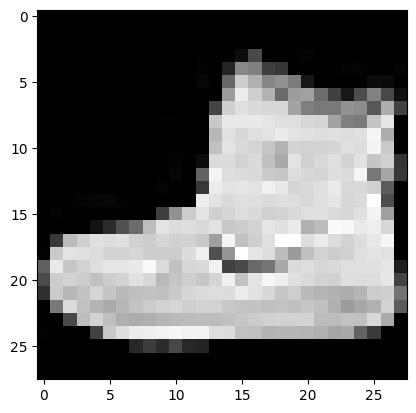

In [7]:
#Showing the image
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = 'gray')
plt.show

## *MLP Model with RELU Activation*

In [8]:
#Building an MLP classifier using a Sequential Model from Keras
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
#Compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [10]:
#Model Training
model_history = model.fit(x_train, y_train, epochs=30, validation_split=0.1)

Epoch 1/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.7368 - accuracy: 0.7592 - val_loss: 0.5284 - val_accuracy: 0.8095
Epoch 2/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.4941 - accuracy: 0.8301 - val_loss: 0.5383 - val_accuracy: 0.7978
Epoch 3/30
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4478 - accuracy: 0.8451 - val_loss: 0.4855 - val_accuracy: 0.8223
Epoch 4/30
1688/1688 [==============================] - 6s 4ms/step - loss: 0.4200 - accuracy: 0.8530 - val_loss: 0.4091 - val_accuracy: 0.8543
Epoch 5/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3998 - accuracy: 0.8605 - val_loss: 0.4209 - val_accuracy: 0.8480
Epoch 6/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3829 - accuracy: 0.8668 - val_loss: 0.4214 - val_accuracy: 0.8505
Epoch 7/30
1688/1688 [==============================] - 13s 8ms/step - loss: 0.3703 - accuracy: 0.8693 - val_loss: 0.4139 - val_accuracy

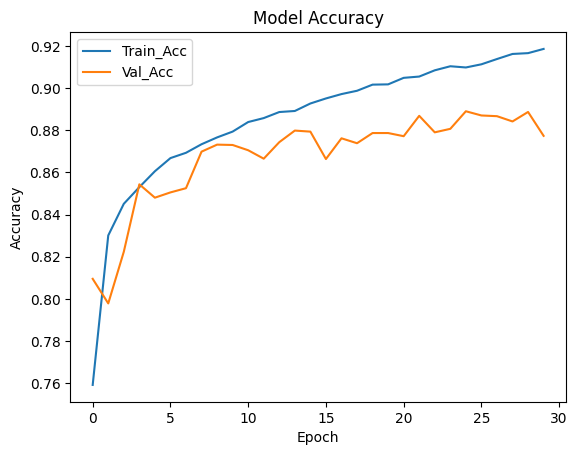

In [11]:
#Visualising Training and Validation Accuracy
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train_Acc', 'Val_Acc'], loc='upper left')
plt.show()

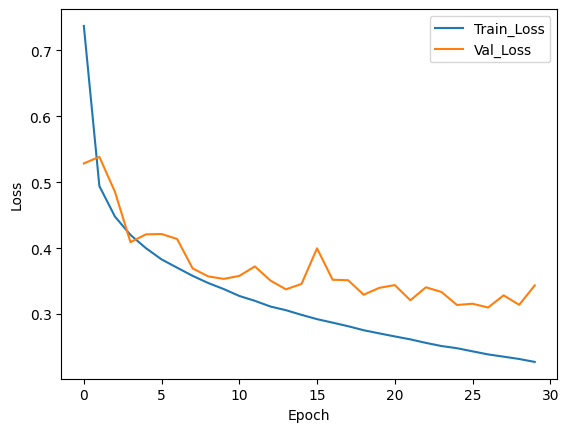

In [12]:
#Visualising Training and Validation Loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train_Loss', 'Val_Loss'], loc='upper right')

In [13]:
#Evaluating the model on the test data
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3559 - accuracy: 0.8721


[0.3559192419052124, 0.8720999956130981]

## ***MLP Model with RELU Activation and Batch Normalisation***

In [14]:
#Batch Normalisation
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 batch_normalization_1 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 batch_normalization_2 (Bat  (None, 100)              

In [15]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')

In [16]:
model_history = model.fit(x_train, y_train, epochs = 30, validation_split=0.1)

Epoch 1/30
1688/1688 [==============================] - 12s 7ms/step - loss: 0.5306 - accuracy: 0.8152 - val_loss: 0.3825 - val_accuracy: 0.8602
Epoch 2/30
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3927 - accuracy: 0.8606 - val_loss: 0.3566 - val_accuracy: 0.8712
Epoch 3/30
1688/1688 [==============================] - 11s 6ms/step - loss: 0.3539 - accuracy: 0.8733 - val_loss: 0.3463 - val_accuracy: 0.8800
Epoch 4/30
1688/1688 [==============================] - 11s 6ms/step - loss: 0.3262 - accuracy: 0.8826 - val_loss: 0.3397 - val_accuracy: 0.8792
Epoch 5/30
1688/1688 [==============================] - 11s 6ms/step - loss: 0.3042 - accuracy: 0.8897 - val_loss: 0.3258 - val_accuracy: 0.8847
Epoch 6/30
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2916 - accuracy: 0.8937 - val_loss: 0.3223 - val_accuracy: 0.8868
Epoch 7/30
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2739 - accuracy: 0.8990 - val_loss: 0.3246 - val_ac

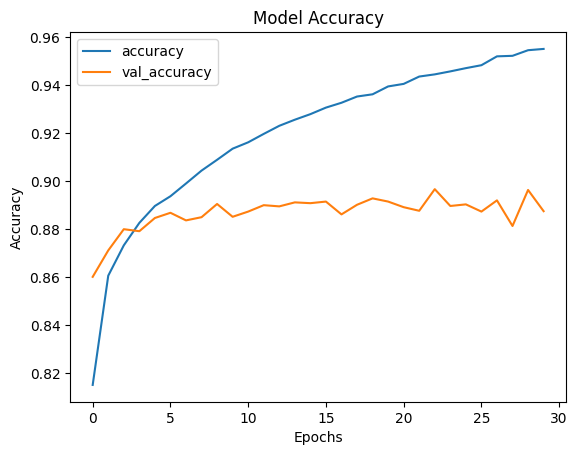

In [17]:
#Plotting Training and Validation Accuracy (Batch-Normalisation)
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

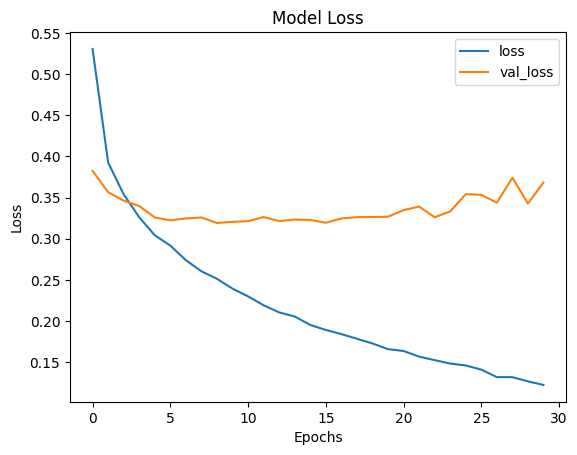

In [18]:
#Plotting Training and Validation Loss (Batch-Normalisation)
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()

In [19]:
#Evaluating the Model (Batch-Optimization)
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3842 - accuracy: 0.8828


[0.38423171639442444, 0.8827999830245972]

## ***MLP Model with RELU Activation, Batch Normalisation and ADAM Optimizer***

In [20]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_3 (Bat  (None, 784)               3136      
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 batch_normalization_4 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 batch_normalization_5 (Bat  (None, 100)              

In [21]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), metrics='accuracy')

In [22]:
model_history = model.fit(x_train, y_train, epochs=30, validation_split=0.1)

Epoch 1/30
1688/1688 [==============================] - 15s 8ms/step - loss: 0.4693 - accuracy: 0.8303 - val_loss: 0.3798 - val_accuracy: 0.8628
Epoch 2/30
1688/1688 [==============================] - 16s 9ms/step - loss: 0.3640 - accuracy: 0.8666 - val_loss: 0.3315 - val_accuracy: 0.8803
Epoch 3/30
1688/1688 [==============================] - 13s 8ms/step - loss: 0.3272 - accuracy: 0.8796 - val_loss: 0.3187 - val_accuracy: 0.8825
Epoch 4/30
1688/1688 [==============================] - 13s 8ms/step - loss: 0.3033 - accuracy: 0.8887 - val_loss: 0.3226 - val_accuracy: 0.8832
Epoch 5/30
1688/1688 [==============================] - 13s 8ms/step - loss: 0.2824 - accuracy: 0.8943 - val_loss: 0.3086 - val_accuracy: 0.8852
Epoch 6/30
1688/1688 [==============================] - 13s 8ms/step - loss: 0.2662 - accuracy: 0.9010 - val_loss: 0.3077 - val_accuracy: 0.8877
Epoch 7/30
1688/1688 [==============================] - 13s 8ms/step - loss: 0.2521 - accuracy: 0.9052 - val_loss: 0.3039 - val_ac

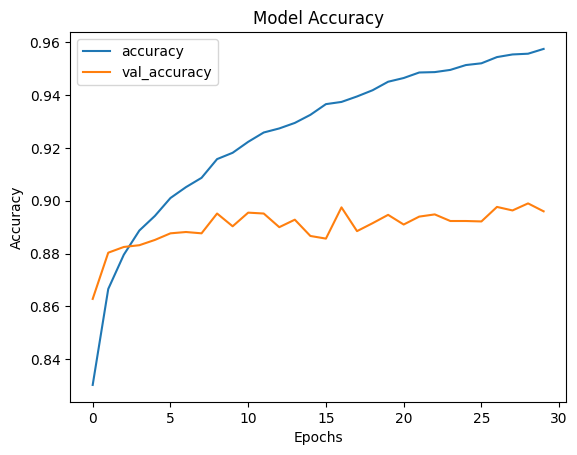

In [23]:
#Visualising Training Accuracy with ADAM and Batch Normalization
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')

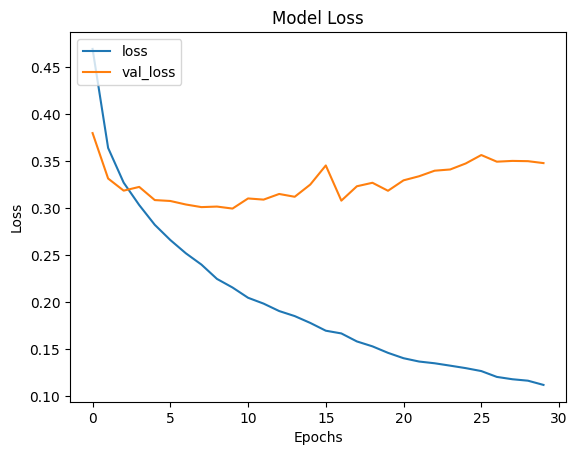

In [24]:
#Visualising Loss with ADAM and Batch Normalization
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(['loss', 'val_loss'], loc='upper left')

In [25]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3998 - accuracy: 0.8922


[0.39981797337532043, 0.8921999931335449]

## ***MLP Model with RELU Activation, Batch Normalisation, ADAM Optimizer and Dropout***

In [28]:
model_2 = keras.models.Sequential()
model_2.add(keras.layers.Flatten(input_shape = [28,28]))
model_2.add(keras.layers.BatchNormalization())
model_2.add(keras.layers.Dropout(rate=0.2))
model_2.add(keras.layers.Dense(300, activation = 'relu'))
model_2.add(keras.layers.BatchNormalization())
model_2.add(keras.layers.Dropout(rate=0.2))
model_2.add(keras.layers.Dense(100, activation ='relu'))
model_2.add(keras.layers.BatchNormalization())
model_2.add(keras.layers.Dropout(rate=0.2))
model_2.add(keras.layers.Dense(10, activation ='softmax'))
model_2.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), metrics='Accuracy')
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_9 (Bat  (None, 784)               3136      
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 300)               235500    
                                                                 
 batch_normalization_10 (Ba  (None, 300)               1200      
 tchNormalization)                                               
                                                                 
 dropout_1 (Dropout)         (None, 300)              

In [31]:
model_2_history = model_2.fit(x_train, y_train, validation_split=0.1, epochs=30)

Epoch 1/30
1688/1688 [==============================] - 16s 8ms/step - loss: 0.5621 - Accuracy: 0.7989 - val_loss: 0.3817 - val_Accuracy: 0.8585
Epoch 2/30
1688/1688 [==============================] - 15s 9ms/step - loss: 0.4412 - Accuracy: 0.8391 - val_loss: 0.3454 - val_Accuracy: 0.8697
Epoch 3/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.4039 - Accuracy: 0.8517 - val_loss: 0.3334 - val_Accuracy: 0.8765
Epoch 4/30
1688/1688 [==============================] - 15s 9ms/step - loss: 0.3869 - Accuracy: 0.8574 - val_loss: 0.3228 - val_Accuracy: 0.8825
Epoch 5/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.3649 - Accuracy: 0.8663 - val_loss: 0.3318 - val_Accuracy: 0.8803
Epoch 6/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.3541 - Accuracy: 0.8704 - val_loss: 0.3150 - val_Accuracy: 0.8840
Epoch 7/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.3442 - Accuracy: 0.8734 - val_loss: 0.2970 - val_Ac

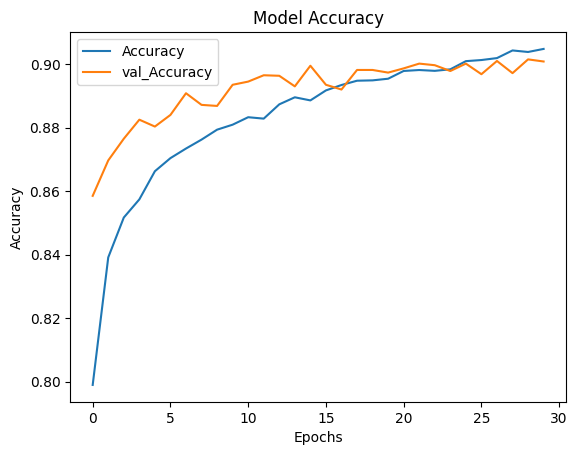

In [33]:
plt.plot(model_2_history.history['Accuracy'])
plt.plot(model_2_history.history['val_Accuracy'])
plt.legend(['Accuracy', 'val_Accuracy'], loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

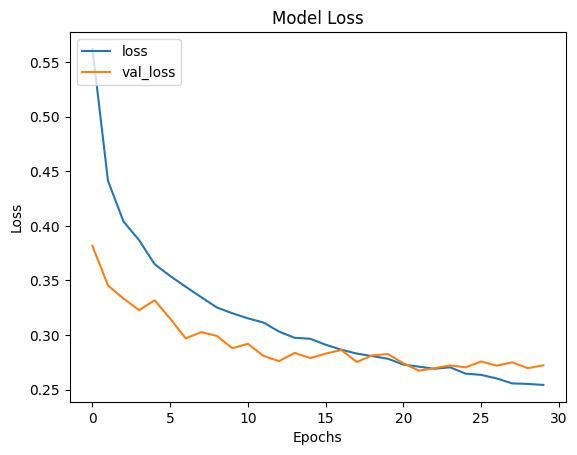

In [34]:
plt.plot(model_2_history.history['loss'])
plt.plot(model_2_history.history['val_loss'])
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

In [35]:
model_2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2956 - Accuracy: 0.8953


[0.29556164145469666, 0.8952999711036682]

## ***MLP Model with Early Callbacks (RELU Activation, Batch Normalisation, ADAM Optimizer and Dropout)***

In [41]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model_3 = keras.models.Sequential()
model_3.add(keras.layers.Flatten(input_shape = [28,28]))
model_3.add(keras.layers.BatchNormalization())
model_3.add(keras.layers.Dropout(rate=0.2))
model_3.add(keras.layers.Dense(300, activation = 'relu'))
model_3.add(keras.layers.BatchNormalization())
model_3.add(keras.layers.Dropout(rate=0.2))
model_3.add(keras.layers.Dense(100, activation ='relu'))
model_3.add(keras.layers.BatchNormalization())
model_3.add(keras.layers.Dropout(rate=0.2))
model_3.add(keras.layers.Dense(10, activation ='softmax'))
model_3.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), metrics='Accuracy')
model_3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_18 (Ba  (None, 784)               3136      
 tchNormalization)                                               
                                                                 
 dropout_9 (Dropout)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 300)               235500    
                                                                 
 batch_normalization_19 (Ba  (None, 300)               1200      
 tchNormalization)                                               
                                                                 
 dropout_10 (Dropout)        (None, 300)              

In [42]:
model_3_history = model_3.fit(x_train, y_train, validation_split=0.1, epochs=50, callbacks=[early_stopping_cb])

Epoch 1/50
1688/1688 [==============================] - 16s 8ms/step - loss: 0.5597 - Accuracy: 0.8005 - val_loss: 0.3831 - val_Accuracy: 0.8567
Epoch 2/50
1688/1688 [==============================] - 14s 8ms/step - loss: 0.4393 - Accuracy: 0.8402 - val_loss: 0.3479 - val_Accuracy: 0.8705
Epoch 3/50
1688/1688 [==============================] - 14s 8ms/step - loss: 0.4066 - Accuracy: 0.8506 - val_loss: 0.3383 - val_Accuracy: 0.8733
Epoch 4/50
1688/1688 [==============================] - 14s 8ms/step - loss: 0.3847 - Accuracy: 0.8587 - val_loss: 0.3267 - val_Accuracy: 0.8750
Epoch 5/50
1688/1688 [==============================] - 15s 9ms/step - loss: 0.3650 - Accuracy: 0.8645 - val_loss: 0.3122 - val_Accuracy: 0.8860
Epoch 6/50
1688/1688 [==============================] - 16s 9ms/step - loss: 0.3551 - Accuracy: 0.8690 - val_loss: 0.3016 - val_Accuracy: 0.8843
Epoch 7/50
1688/1688 [==============================] - 16s 9ms/step - loss: 0.3439 - Accuracy: 0.8716 - val_loss: 0.2966 - val_Ac

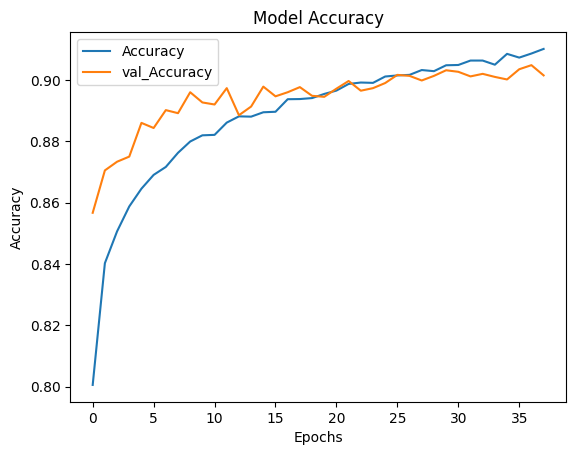

In [44]:
plt.plot(model_3_history.history['Accuracy'])
plt.plot(model_3_history.history['val_Accuracy'])
plt.legend(['Accuracy', 'val_Accuracy'], loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

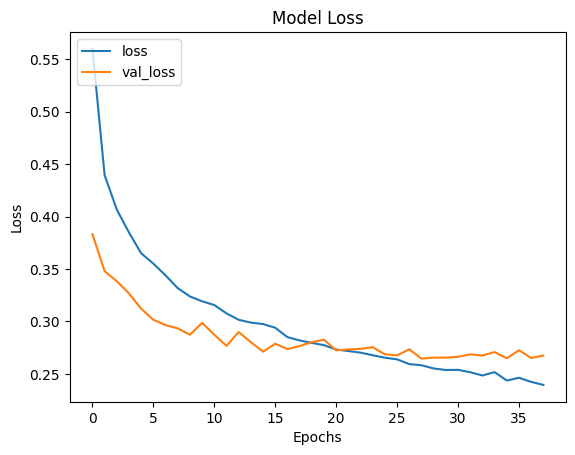

In [45]:
plt.plot(model_3_history.history['loss'])
plt.plot(model_3_history.history['val_loss'])
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

In [48]:
model_3.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2923 - Accuracy: 0.8961


[0.2923184037208557, 0.8960999846458435]